# 自動車の走行距離予測

>作成日：2021/10/12  
>ファイル保存先：signate_data

## ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Duplicate key in file WindowsPath('C:/Anaconda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  IPAexGothic')


## データのインポート

In [2]:
# 学習データ
df = pd.read_csv("signate_data/train.tsv", sep="\t")
df.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


## データの確認・欠損値処理

In [3]:
df.isnull().sum()

id              0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [4]:
# idカラムの削除
df = df.drop("id", axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           199 non-null    float64
 1   cylinders     199 non-null    int64  
 2   displacement  199 non-null    float64
 3   horsepower    199 non-null    object 
 4   weight        199 non-null    float64
 5   acceleration  199 non-null    float64
 6   model year    199 non-null    int64  
 7   origin        199 non-null    int64  
 8   car name      199 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 14.1+ KB


In [9]:
df_numeric = df.drop(["car name", "horsepower"], axis=1)
df_horsepower = df[["horsepower"]]
df_categoric = df[["car name"]]

In [10]:
df_horsepower.replace("?", np.nan, inplace=True)
df_horsepower = df_horsepower.astype(float)
df_horsepower = df_horsepower.fillna(df_horsepower.mean())
df_numeric = pd.concat([df_numeric, df_horsepower], axis=1)
df_numeric.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,24.307035,5.296482,183.311558,2883.839196,15.647739,76.165829,1.582915,101.297436
std,7.797665,1.644562,98.400457,819.766870,2.701885,3.802928,0.798932,35.201207
min,9.000000,3.000000,71.000000,1613.000000,8.500000,70.000000,1.000000,46.000000
25%,18.000000,4.000000,98.000000,2217.500000,14.000000,73.000000,1.000000,75.000000
50%,24.000000,4.000000,140.000000,2702.000000,15.500000,76.000000,1.000000,92.000000
75%,30.500000,6.000000,250.000000,3426.500000,17.150000,80.000000,2.000000,112.500000
max,44.600000,8.000000,454.000000,5140.000000,23.700000,82.000000,3.000000,220.000000


In [11]:
# カテゴリ変数の数値化
from sklearn.preprocessing import LabelEncoder
df_label = df_categoric.copy()
le = LabelEncoder()
le.fit(df_label["car name"])
df_label["label"] = le.transform(df_label["car name"])

In [12]:
df = pd.concat([df_numeric, df_label["label"]], axis=1)

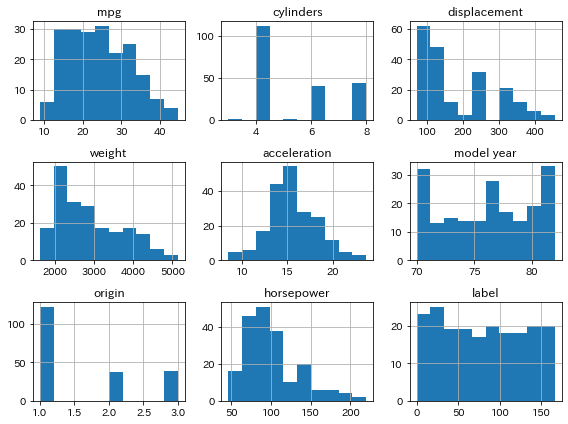

In [13]:
# 数量変数のヒストグラム
df.hist(figsize=(8, 6))
plt.tight_layout()
plt.show()

In [14]:
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower,label
0,29.0,4,135.0,2525.0,16.0,82,1,84.0,56
1,31.9,4,89.0,1925.0,14.0,79,2,71.0,166
2,19.0,6,156.0,2930.0,15.5,76,3,108.0,148
3,28.0,4,90.0,2125.0,14.5,74,1,75.0,63
4,37.7,4,89.0,2050.0,17.3,81,3,62.0,150


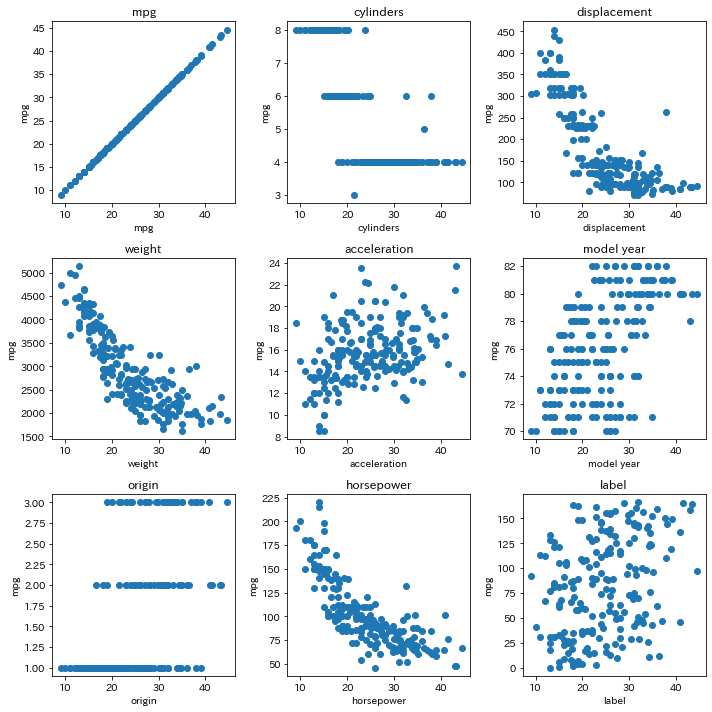

In [15]:
# 数量変数の散布図
plt.figure(figsize=(10, 10))
for ncol, colname in enumerate(df.columns):
    plt.subplot(3, 3, ncol+1)
    plt.scatter(df["mpg"], df[colname])
    plt.title(colname)
    plt.xlabel(colname)
    plt.ylabel("mpg")
plt.tight_layout()
plt.show()

## データのエンコード

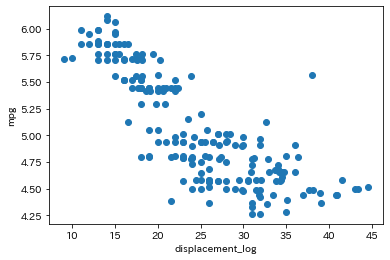

In [16]:
# displacementの対数化
df["displacement_log"] = np.log(df.displacement)
plt.scatter(df["mpg"], df["displacement_log"])
plt.ylabel("mpg")
plt.xlabel("displacement_log")
plt.show()

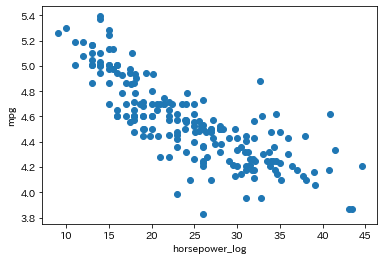

In [17]:
# horsepowerの対数化
df["horsepower_log"] = np.log(df["horsepower"])
plt.scatter(df["mpg"], df["horsepower_log"])
plt.ylabel("mpg")
plt.xlabel("horsepower_log")
plt.show()

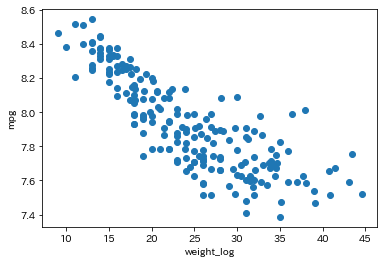

In [18]:
# weightの対数化
df["weight_log"] = np.log(df["weight"])
plt.scatter(df["mpg"], df["weight_log"])
plt.ylabel("mpg")
plt.xlabel("weight_log")
plt.show()

In [19]:
# displacementの分割
df.loc[df["displacement"] >= 250, "displacement_over"] = df["displacement"]
df.loc[~(df["displacement"] >= 250), "displacement_under"] = df["displacement"]
df = df.fillna(0)

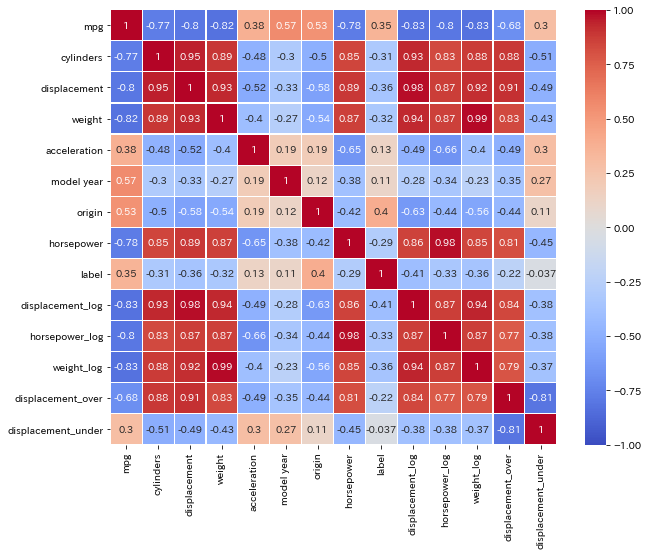

In [20]:
# 相関マップ
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap="coolwarm", linewidths=0.1)
plt.show()

## 燃費予測モデルの作成

In [21]:
# ライブラリのインポート
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

In [22]:
# 変数の準備（学習データ）
X = df[["cylinders", "displacement_over", "displacement_under", "weight_log", "acceleration", "model year", "origin", "horsepower_log", "label"]]
# X_dummy = pd.get_dummies(X)
y = df["mpg"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(139, 9) (139,) (60, 9) (60,)


In [24]:
lr = LR()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [26]:
mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("train:", rmse_train)
print("test:", rmse_test)

train: 2.9377602857679284
test: 2.8967921285159854


## モデル精度改善のメモ

#### 改善ナシ
>X = df[["cylinders", "displacement", "weight", "acceleration", "model year", "origin", "horsepower", "label"]]  
RMSE  
train: 3.236406339818468  
test: 3.2923437634407873
  
#### displacementを対数化  
>X = df[["cylinders", "displacement_log", "weight", "acceleration", "model year", "origin", "horsepower", "label"]]  
RMSE  
train: 3.225605556288965  
test: 3.189797099603577  
  
#### labelナシ  
>X = df[["cylinders", "displacement_log", "weight", "acceleration", "model year", "origin", "horsepower"]]  
RMSE  
train: 3.2268683287677566  
test: 3.2015721587985317  
  
#### horsepowerの対数化  
>X = df[["cylinders", "displacement_log", "weight", "acceleration", "model year", "origin", "horsepower_log", "label"]]  
RMSE  
train: 3.13609792599676  
test: 2.992430746489007  
  
#### weightの対数化  
>X = df[["cylinders", "displacement_log", "weight_log", "acceleration", "model year", "origin", "horsepower_log", "label"]]  
RMSE  
train: 3.054203785344424  
test: 2.926461099831106  
  
#### displacementの分割  
>X = df[["cylinders", "displacement_over", "displacement_under", "weight_log", "acceleration", "model year", "origin", "horsepower_log", "label"]]  
RMSE  
train: 2.9377602857679284  
test: 2.8967921285159854  


## 結果の可視化

In [27]:
max_test = max(y_test)
min_test = min(y_test)
max_pred_test = max(y_pred_test)
min_pred_test = min(y_pred_test)
max_value = np.maximum(max_test, max_pred_test)
min_value = np.minimum(min_test, min_pred_test)

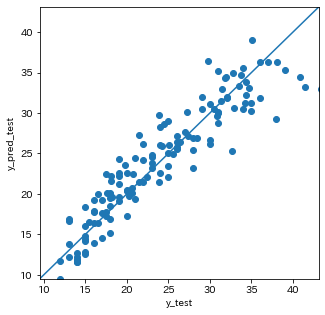

In [28]:
plt.figure(figsize=(5,5))
plt.xlim([min_value, max_value])
plt.ylim([min_value, max_value])
plt.scatter(y_train, y_pred_train)
plt.plot((min_value, max_value), (min_value, max_value))
plt.xlabel("y_test")
plt.ylabel("y_pred_test")
plt.show()

## 評価データの予測と出力

In [33]:
# テストデータ
test_df = pd.read_csv("signate_data/test.tsv", sep="\t")
test_df_index = test_df["id"]
test_df = test_df.drop("id", axis=1)
test_df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,6,145.0,76.00,3160.0,19.6,81,2,volvo diesel
1,6,250.0,98.00,3525.0,19.0,77,1,ford granada
2,4,119.0,92.00,2434.0,15.0,80,3,datsun 510 hatchback
3,6,258.0,110.0,2962.0,13.5,71,1,amc hornet sportabout (sw)
4,4,97.0,88.00,2100.0,16.5,72,3,toyota corolla 1600 (sw)


In [34]:
# テストデータの整形①
test_df_numeric = test_df.drop(["horsepower", "car name"], axis=1)
test_df_horsepower = test_df[["horsepower"]]
test_df_categoric = test_df[["car name"]]

In [35]:
# テストデータの整形②
test_df_horsepower = test_df_horsepower.replace("?", np.nan)
test_df_horsepower = test_df_horsepower.astype(float)
test_df_horsepower = test_df_horsepower.fillna(test_df_horsepower.mean())
test_df_label = test_df_categoric.copy()
le = LabelEncoder()
le.fit(test_df_label["car name"])
test_df_label["label"] = le.transform(test_df_label["car name"])
test_df = pd.concat([test_df_numeric, test_df_horsepower["horsepower"], test_df_label["label"]], axis=1)
test_df.head()

,cylinders,displacement,weight,acceleration,model year,origin,horsepower,label
0,6,145.0,3160.0,19.6,81,2,76.0,166
1,6,250.0,3525.0,19.0,77,1,98.0,76
2,4,119.0,2434.0,15.0,80,3,92.0,44
3,6,258.0,2962.0,13.5,71,1,110.0,5
4,4,97.0,2100.0,16.5,72,3,88.0,154


In [37]:
# テストデータの整形②
test_df["weight_log"] = np.log(test_df["weight"])
test_df["horsepower_log"] = np.log(test_df["horsepower"])
test_df.loc[test_df["displacement"] >= 250, "displacement_over"] = test_df["displacement"]
test_df.loc[~(test_df["displacement"] >= 250), "displacement_under"] = test_df["displacement"]
test_df = test_df.fillna(0)

In [38]:
# 変数の準備（テストデータ）
X_t = test_df[["cylinders", "displacement_over", "displacement_under", "weight_log", "acceleration", "model year", "origin", "horsepower_log", "label"]]
# X_test_dummy = pd.get_dummies(X)

In [39]:
y_pred_t = lr.predict(X_t)

In [40]:
result = pd.DataFrame(y_pred_t)
result.index = test_df_index
result.to_csv("test_pred_2.csv", header=False)